In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_train = pd.read_csv('../input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_test = pd.read_csv('../input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

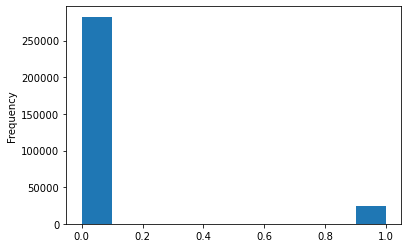

In [5]:
app_train['TARGET'].astype(int).plot.hist()

In [6]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*df.isnull().sum()/len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [8]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
le = LabelEncoder()
le_count = 0
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [12]:
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [13]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [14]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

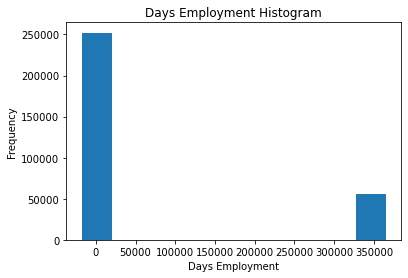

In [15]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [16]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

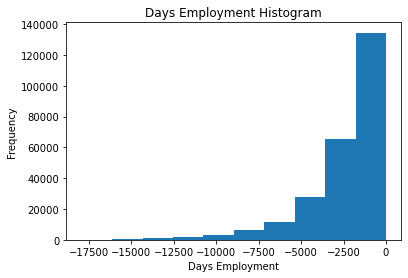

In [17]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [18]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' 
      % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [19]:
# Find correlations with the target and sort
correlations = app_train.corrwith(app_train["TARGET"]).sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
dtype: float64

Most Negative Correlation

In [20]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982692

Text(0, 0.5, 'Count')

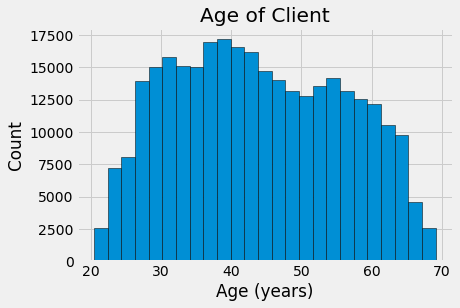

In [21]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

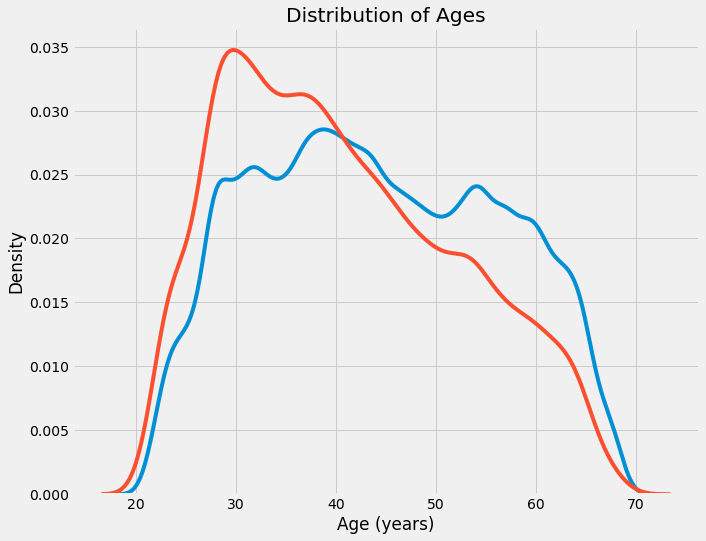

In [22]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

In [23]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [24]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

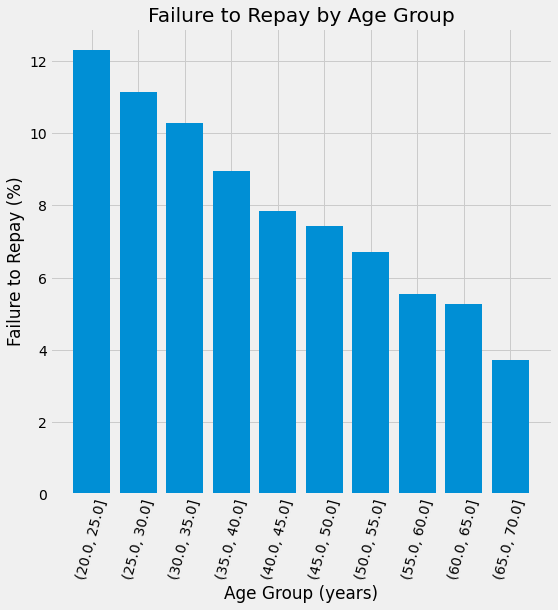

In [25]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [26]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

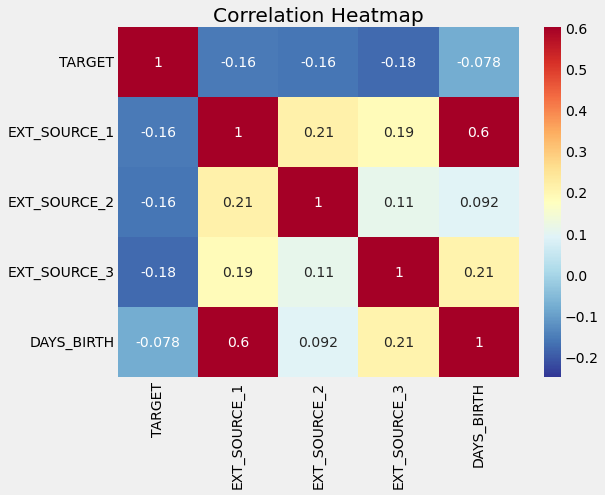

In [27]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

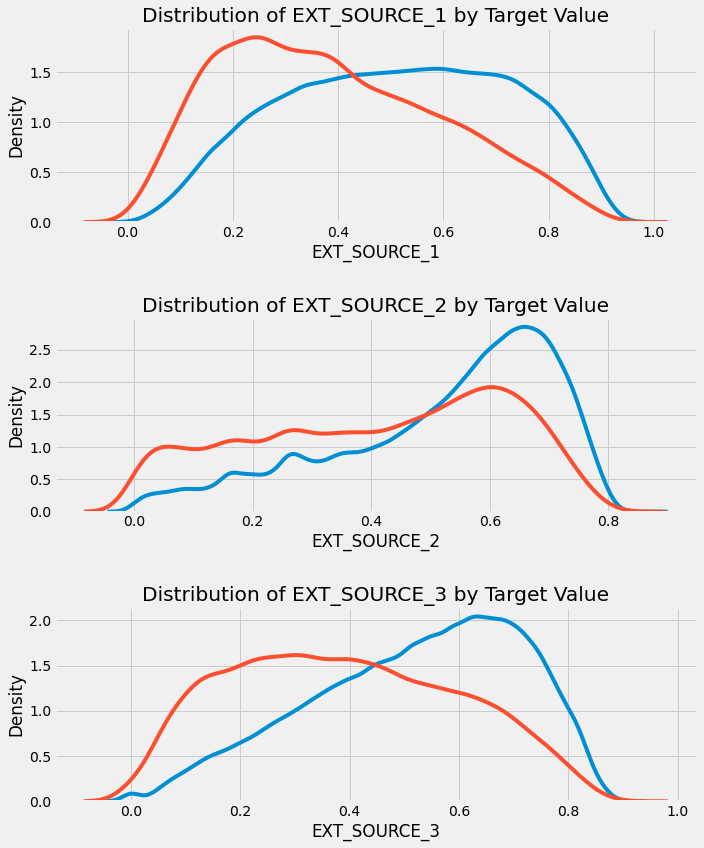

In [28]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [29]:
# Copy the data for plotting
#plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
#plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
#plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
#def corr_func(x, y, **kwargs):
   # r = np.corrcoef(x, y)[0][1]
   ## ax = plt.gca()
   # ax.annotate("r = {:.2f}".format(r),
    #            xy=(.2, .8), xycoords=ax.transAxes,
     #           size = 20)

# Create the pairgrid object
#grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
      #              hue = 'TARGET', 
      #              vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
#grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
#grid.map_diag(sns.kdeplot)

# Bottom is density plot
#grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

#plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

### below - your part

## Feature Engineering

### I. Polynomial Features

In [30]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures                     
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [31]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

##### Totally 35 features (with individual features raised to powers up to degree 3)

In [32]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2',                                                                  'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print()
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64

DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


##### add these features to a copy of the training & testing data
##### evaluate models with and without features 

In [33]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### II. Domain Knowledge Features

1. CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
2. ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
3. DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [34]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

##### Visualize these domain knowledge variables by drawing KDE plot

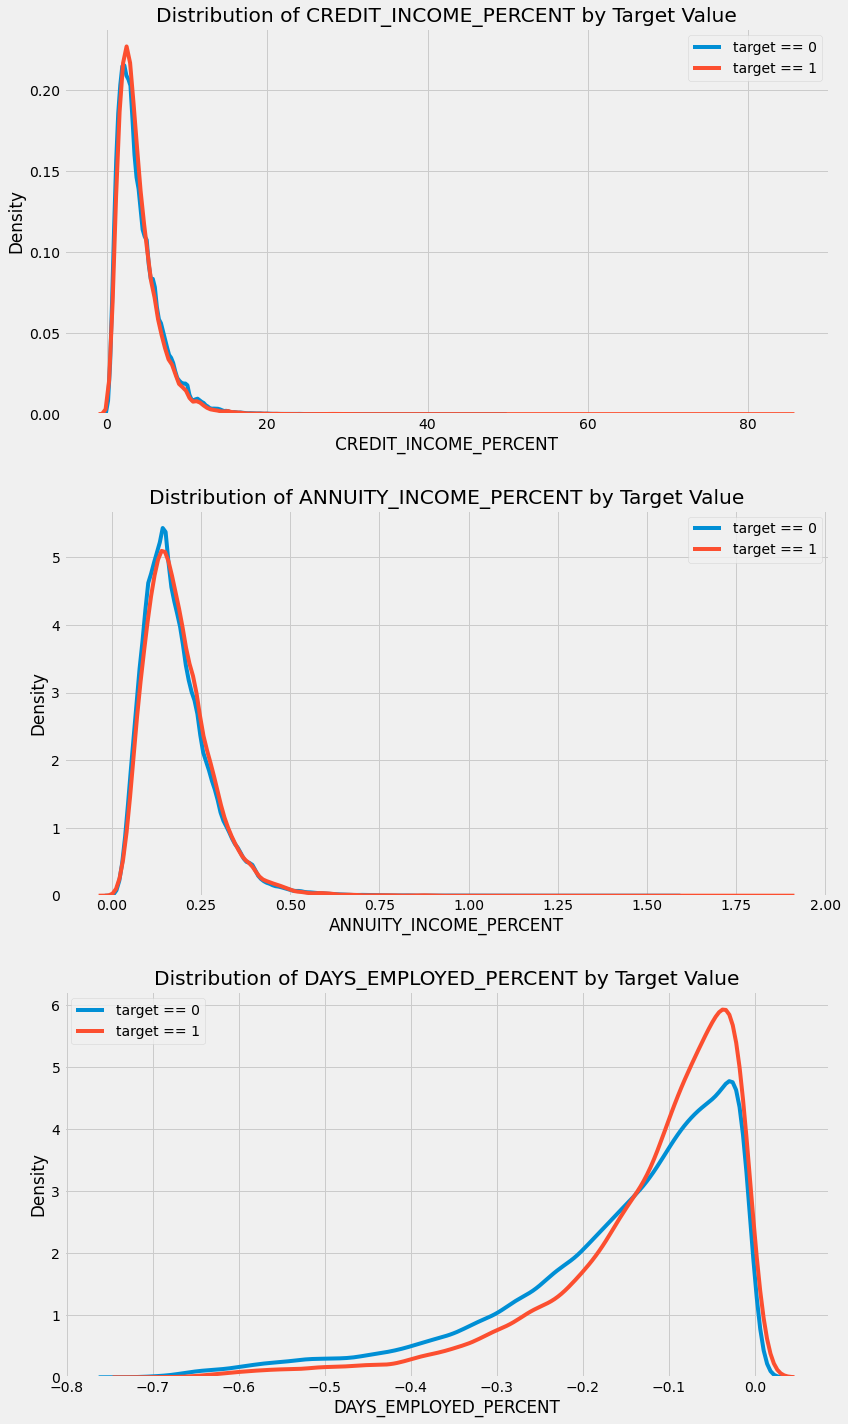

In [35]:
plt.figure(figsize = (12, 20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    plt.legend()
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, RocCurveDisplay


## Logistic Regression

##### Preprocess data

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Impute missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


##### Lower the regularization parameter C to decrease overfitting

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42, C = 0.0001, n_jobs=-1)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, n_jobs=-1, random_state=42)

In [38]:
y_pred = log_reg.predict_proba(X_test)[:, 1]

ROC AUC score: 0.69


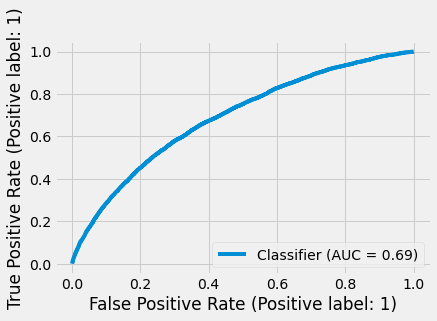

In [39]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(roc_score))

disp = RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

### Make predictions using engineered features

##### I. Testing polynomial features to see those can improve our model or not

In [40]:
poly_features_name = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, train_labels, test_size=0.2, random_state=42)

log_reg_poly =  LogisticRegression(random_state = 42, C = 0.0001, n_jobs=-1)
log_reg_poly.fit(X_train, y_train)
y_pred = log_reg_poly.predict_proba(X_test)[:,1]

ROC AUC score: 0.73


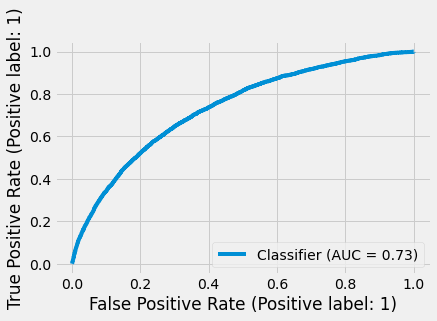

In [41]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(roc_score))

disp = RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

##### II. Testing domain features to see those can improve our model or not

In [42]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')
domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(domain_features, train_labels, test_size=0.2, random_state=42)

log_reg_domain = LogisticRegression(random_state = 42, C = 0.0001, n_jobs=-1)
log_reg_domain.fit(X_train, y_train)
y_pred = log_reg_domain.predict_proba(X_test)[:, 1]

ROC AUC score: 0.69


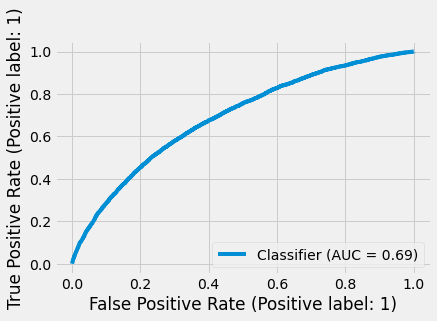

In [44]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(roc_score))

disp = RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

### Support Vector Machine

##### Preprocess data

In [45]:
train = app_train.copy()
train_labels = train['TARGET']
train = train.drop(columns = ['TARGET']).sample(5000, random_state = 42)
train_labels, train = train_labels[train.index], train

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Impute missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
print('Target data shape: ', train_labels.shape)

Training data shape:  (5000, 240)
Testing data shape:  (48744, 240)
Target data shape:  (5000,)


##### Use SVP to fit model and make prediction

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)

In [47]:
from sklearn import svm
svm_classification = svm.SVC(verbose = True, probability = True)
svm_classification.fit(X_train, y_train)

[LibSVM]..*..*
optimization finished, #iter = 4719
obj = -493.302852, rho = 1.001811
nSV = 1241, nBSV = 277
Total nSV = 1241
..*..*
optimization finished, #iter = 4485
obj = -484.962424, rho = 0.976796
nSV = 1189, nBSV = 274
Total nSV = 1189
..*..*
optimization finished, #iter = 4740
obj = -492.380256, rho = 0.997885
nSV = 1182, nBSV = 280
Total nSV = 1182
..*..*
optimization finished, #iter = 4959
obj = -480.791172, rho = 0.981134
nSV = 1246, nBSV = 265
Total nSV = 1246
..*..*
optimization finished, #iter = 4572
obj = -484.194715, rho = 0.950873
nSV = 1168, nBSV = 279
Total nSV = 1168
...*...*
optimization finished, #iter = 6368
obj = -610.573391, rho = -0.982146
nSV = 1511, nBSV = 345
Total nSV = 1511


SVC(probability=True, verbose=True)

In [48]:
y_pred = svm_classification.predict_proba(X_test)[:, 1]

ROC AUC score: 0.67


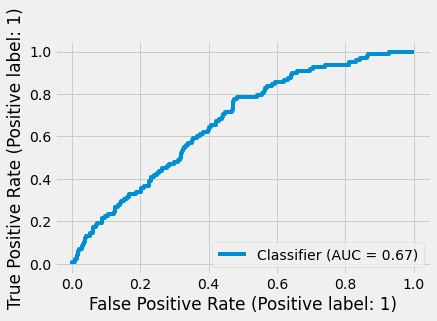

In [49]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(roc_score))

disp = RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

## Deep Learning

##### Preprocess data

In [38]:
train = app_train.copy()
train_labels = train['TARGET']
train = train.drop(columns = ['TARGET'])
train_labels, train = train_labels[train.index], train

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Impute missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
print('Target data shape: ', train_labels.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)
Target data shape:  (307511,)


In [39]:
# Define Neural Network Model
import torch
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print("GPU NAME --> ", torch.cuda.get_device_name(0))

# SET HYPERPARAMETERS
hp_test_size = 0.2
hp_epochs = 30
hr_batch_size = 320
hp_lr= 0.000008
hp_emb_drop = 0.04
hp_layers = [800, 350]
hp_ps = [0.001,0.01]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)

In [41]:
# CREATE TENSORS
print("CREATING TENSORS...")
def create_tensors(input_df):
  stack = []
  if isinstance(input_df, np.ndarray):
    return torch.tensor(input_df, dtype=torch.float)
  
  for column in input_df.columns:
    if input_df.dtypes[column] == np.int64 or input_df.dtypes[column] == np.float64:
      stack.append(input_df[column].astype(np.float64))
    else:
      stack.append(input_df[column].cat.codes.values)
  return torch.tensor(np.stack(stack, 1), dtype=torch.float)

tensor_x_train = create_tensors(X_train).float().to(device)
tensor_y_train = torch.tensor(y_train.values).flatten().float().to(device)
tensor_x_test = create_tensors(X_test).float().to(device)
tensor_y_test = torch.tensor(y_test.values).flatten().float().to(device)


# tensor_x_train_cat = create_tensors(x_train[categorical_columns]).float().to(device)
# tensor_x_train_num = create_tensors(x_train[numerical_columns]).float().to(device)
# tensor_y_train = torch.tensor(y_train.values).flatten().float().to(device)

# tensor_x_valid_cat = create_tensors(x_validation[categorical_columns]).float().to(device)
# tensor_x_valid_num = create_tensors(x_validation[numerical_columns]).float().to(device)
# tensor_y_valid = torch.tensor(y_validation.values).flatten().float().to(device)

# tensor_x_test_cat = create_tensors(test_df[categorical_columns]).float().to(device)
# tensor_x_test_num = create_tensors(test_df[numerical_columns]).float().to(device)

# # CREATE CATEGORICAL EMBEDDING SIZES
# categorical_columns_size = [len(df[column].cat.categories) for column in categorical_columns]
# categorical_embedding_sizes = [(col_size, min(50, (col_size + 1) // 2)) for col_size in categorical_columns_size]


CREATING TENSORS...


In [49]:
class Model(nn.Module):
    def __init__(self, input_size, layers, ps):
        super().__init__()
        layerlist = []
        for i, elem in enumerate(layers):
            layerlist.append(nn.Linear(input_size, elem))
            layerlist.append(nn.ReLU())
            layerlist.append(nn.BatchNorm1d(elem))
            layerlist.append(nn.Dropout(ps[i]))
            input_size = elem
        layerlist.append(nn.Linear(layers[-1], 1))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x):
        x = self.layers(x)
        return x

input_size = tensor_x_train.shape[1]
model = Model(input_size, hp_layers, hp_ps).to(device)
sigmoid = nn.Sigmoid()
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=hp_lr)
model.train()

Model(
  (layers): Sequential(
    (0): Linear(in_features=240, out_features=800, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=800, out_features=350, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=350, out_features=1, bias=True)
  )
)

In [50]:
# Train Neural Network Model
print("Training Model...")
train_tensor_dataset = TensorDataset(tensor_x_train, tensor_y_train)
train_loader = DataLoader(train_tensor_dataset, batch_size=hr_batch_size, shuffle=True)
# train_tensor_dataset = TensorDataset(tensor_x_train_cat, tensor_x_train_num, tensor_y_train)
# train_loader = DataLoader(dataset=train_tensor_dataset, batch_size=hr_batch_size, shuffle=True)
test_tensor_dataset = TensorDataset(tensor_x_test, tensor_y_test)
test_loader = DataLoader(test_tensor_dataset, batch_size=hr_batch_size, shuffle=False)


Training Model...


In [51]:
tot_y_train_in = []
tot_y_train_out = []
tot_y_test_in = []
tot_y_test_out = []

for epoch in range(hp_epochs):
    train_losses = []
    for x, y in train_loader:
        y_train = model(x)
        single_loss = loss_function(sigmoid(y_train.squeeze()), y)
        single_loss.backward()
        optimizer.step()
        train_losses.append(single_loss.item())
        tot_y_train_in.append(y)
        tot_y_train_out.append(y_train)
    epoch_loss = 1.0 * sum(train_losses) / len(train_losses)
    epoch_auc = roc_auc_score(torch.cat(tot_y_train_in).cpu().numpy(), \
        torch.cat(tot_y_train_out).cpu().detach().numpy())
    tot_y_train_in = []
    tot_y_train_out = []
    for x, y in test_loader:
        y_test = model(x)
        tot_y_test_in.append(y)
        tot_y_test_out.append(y_test)
    epoch_test_auc = roc_auc_score(torch.cat(tot_y_test_in).cpu().numpy(), \
        torch.cat(tot_y_test_out).cpu().detach().numpy())
    # print("\tepoch: " + str(epoch) + "\tloss: " + str(epoch_loss) + "\tauc: " + str(epoch_auc) + "\ttest_auc: " + str(epoch_test_auc))
    print(f"Epoch: {epoch:3}  loss: {epoch_loss:.4f}  auc: {epoch_auc:.4f}  test_auc: {epoch_test_auc:.4f}")

Epoch:   0  loss: 0.6992  auc: 0.6158  test_auc: 0.5903
Epoch:   1  loss: 0.6547  auc: 0.6815  test_auc: 0.6395
Epoch:   2  loss: 0.6228  auc: 0.7139  test_auc: 0.6654
Epoch:   3  loss: 0.5669  auc: 0.7255  test_auc: 0.6687
Epoch:   4  loss: 0.4953  auc: 0.7254  test_auc: 0.6619
Epoch:   5  loss: 0.4257  auc: 0.7303  test_auc: 0.6506


In [ ]:

# class Model(nn.Module):
#     def __init__(self, embedding_size, input_size, num_numerical_cols, layers, ps):
#         super().__init__()

#         self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
#         self.emb_drop = nn.Dropout(hp_emb_drop)
#         self.bn_cont = nn.BatchNorm1d(num_numerical_cols)

#         layerlist = []
#         for i, elem in enumerate(layers):
#             layerlist.append(nn.Linear(input_size, elem))
#             layerlist.append(nn.ReLU(inplace=True))
#             layerlist.append(nn.BatchNorm1d(layers[i]))
#             layerlist.append(nn.Dropout(ps[i]))
#             input_size = elem
#         layerlist.append(nn.Linear(layers[-1], 1))

#         self.layers = nn.Sequential(*layerlist)
    
#     def forward(self, x_c, x_n):
#         embeddings = [e(x_c[:, i].long()) for i , e in enumerate(self.all_embeddings)]
#         x = torch.cat(embeddings, 1)
#         x = self.emb_drop(x)
#         x_n = self.bn_cont(x_n)
#         x = torch.cat([x, x_n], 1)
#         x = self.layers(x)
#         return x 

# print("Instantiating Model")
# num_numerical_cols = tensor_x_train_num.shape[1]
# num_categorical_cols = sum((nf for ni, nf in categorical_embedding_sizes))
# initial_input_size = num_categorical_cols + num_numerical_cols
# model = Model(categorical_embedding_sizes, initial_input_size, num_numerical_cols, \
#     layers=hp_layers, ps=hp_ps)
# sigmoid = nn.Sigmoid()
# loss_function = nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=hp_lr)
# model.to(device)

# # Train Neural Network Model
# print("Training Model...")
# train_tensor_dataset = TensorDataset(tensor_x_train_cat, tensor_x_train_num, tensor_y_train)
# train_loader = DataLoader(dataset=train_tensor_dataset, batch_size=hr_batch_size, shuffle=True)
# model.train()

In [ ]:
# y_pred = svm_classification.predict_proba(X_test)[:, 1]

ROC AUC score: 0.67


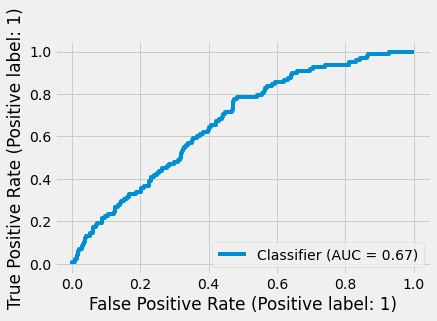

In [ ]:
# from sklearn.metrics import roc_auc_score, RocCurveDisplay
# roc_score = roc_auc_score(y_test, y_pred)
# print('ROC AUC score: {:.2f}'.format(roc_score))

# disp = RocCurveDisplay.from_predictions(y_test, y_pred)
# plt.show()